In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [7]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [9]:
import seaborn as sns

In [10]:
num_cols = [
    'age', 'creatinine_phosphokinase', 'ejection_fraction',
    'platelets', 'serum_creatinine', 'serum_sodium', 'time'
]

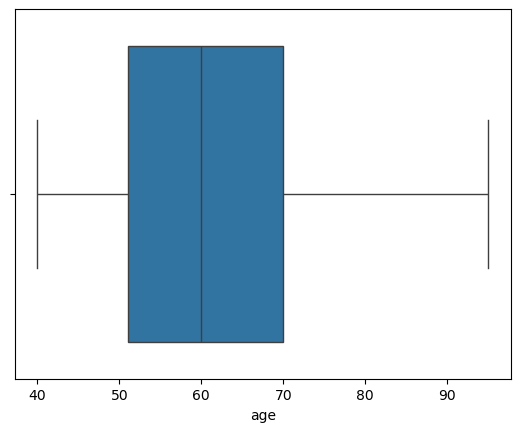

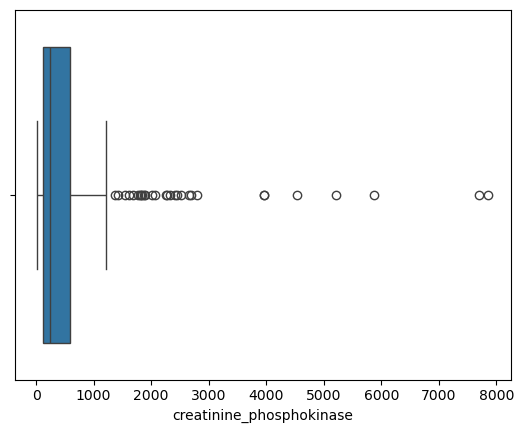

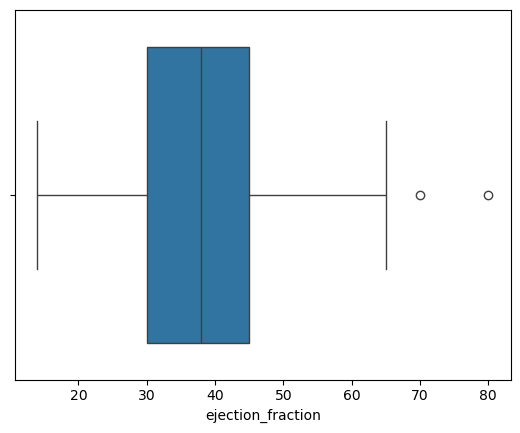

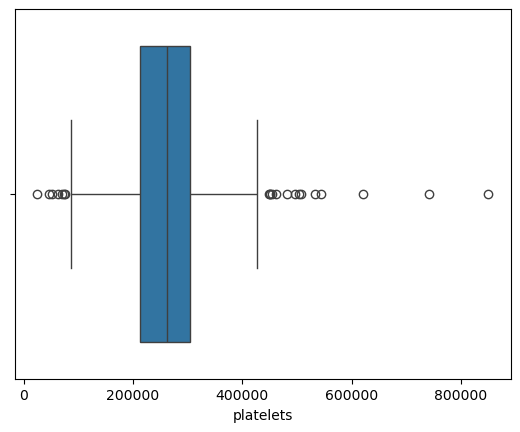

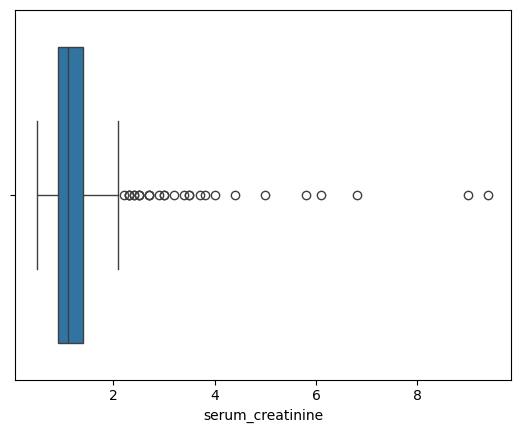

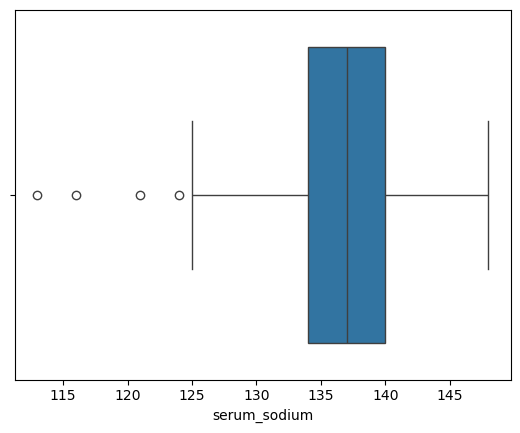

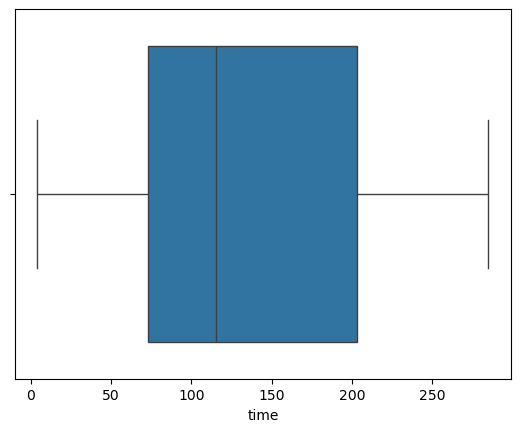

In [11]:
for col in num_cols :
    sns.boxplot(x=df[col])
    plt.show()

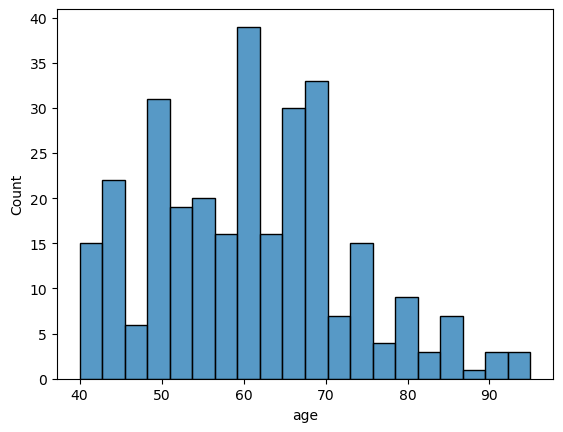

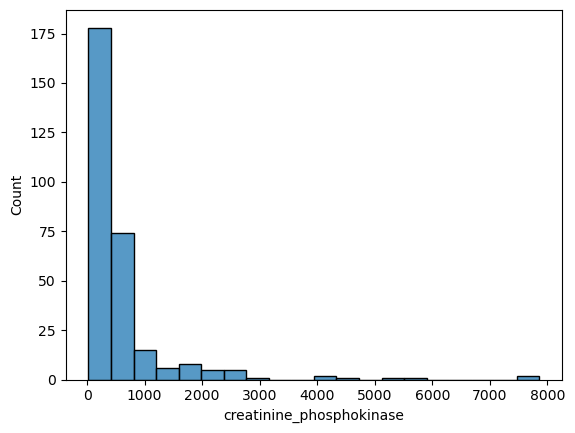

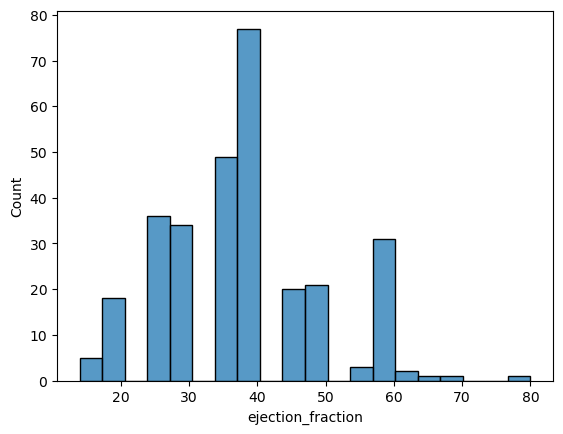

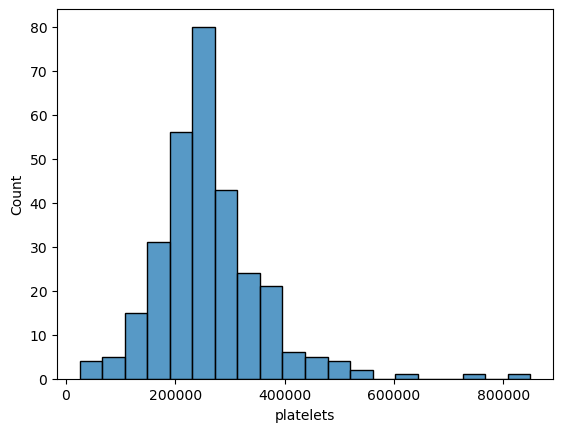

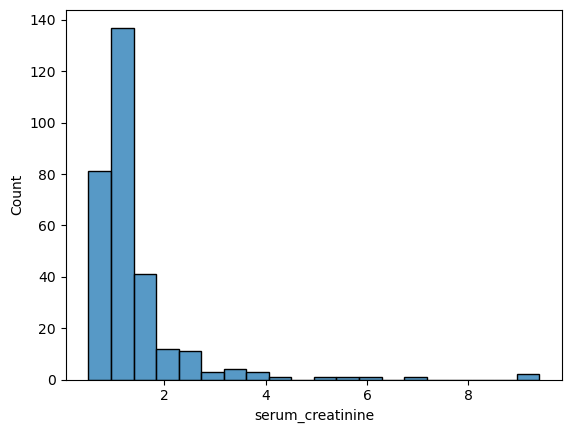

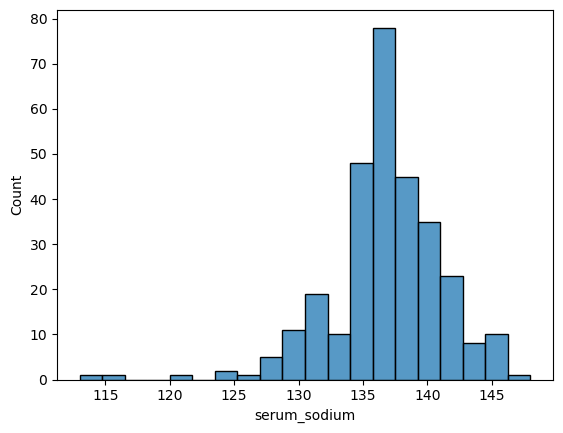

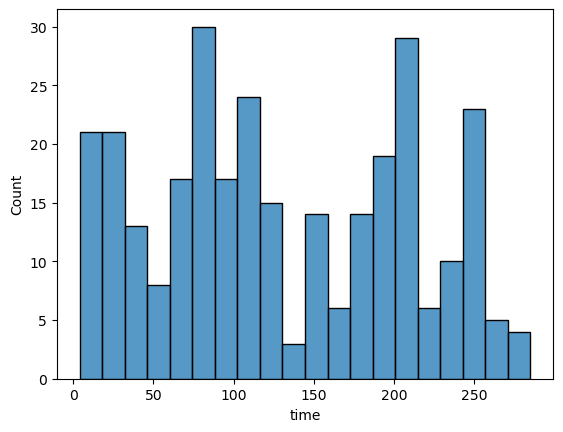

In [12]:
for col in num_cols :
    sns.histplot(x=df[col],bins=20)
    plt.show()

In [15]:
from scipy import stats
import numpy as np

In [16]:
for col in num_cols:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers = df.loc[z_scores > 3]
    print(outliers[col])

Series([], Name: age, dtype: float64)
1      7861
52     3964
60     7702
72     5882
103    5209
134    4540
171    3966
Name: creatinine_phosphokinase, dtype: int64
64    80
Name: ejection_fraction, dtype: int64
105    621000.0
109    850000.0
296    742000.0
Name: platelets, dtype: float64
9      9.4
28     5.8
52     6.8
131    6.1
217    9.0
228    5.0
Name: serum_creatinine, dtype: float64
4      116
19     121
199    113
Name: serum_sodium, dtype: int64
Series([], Name: time, dtype: int64)


In [18]:
for col in num_cols :
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    outliers = df[ (df[col]<lower) | (df[col]>upper)]
    print(outliers[col])


Series([], Name: age, dtype: float64)
1      7861
38     2656
46     1380
52     3964
60     7702
72     5882
103    5209
107    1876
130    1808
134    4540
139    1548
147    1610
149    2261
153    1846
163    2334
164    2442
171    3966
176    1419
187    1896
200    1767
208    2281
227    2794
246    2017
250    2522
280    2695
283    1688
295    1820
296    2060
297    2413
Name: creatinine_phosphokinase, dtype: int64
64     80
217    70
Name: ejection_fraction, dtype: int64
7      454000.0
15      47000.0
47     451000.0
55     461000.0
69     497000.0
105    621000.0
109    850000.0
117    507000.0
162    448000.0
163     75000.0
167     70000.0
200     73000.0
212    481000.0
224    504000.0
230     62000.0
240    533000.0
277     25100.0
279    451000.0
281     51000.0
287    543000.0
296    742000.0
Name: platelets, dtype: float64
4      2.7
9      9.4
10     4.0
28     5.8
31     3.0
35     3.5
38     2.3
39     3.0
48     4.4
52     6.8
54     2.2
56     2.7
61     2.3


In [19]:
for col in num_cols :
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    outliers = df[ (df[col] >= lower) & (df[col]<= upper ) ]
    print(outliers[col])


0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64
0      582
2      146
3      111
4      160
5       47
      ... 
291    320
292    190
293    103
294     61
298    196
Name: creatinine_phosphokinase, Length: 270, dtype: int64
0      20
1      38
2      20
3      20
4      20
       ..
294    38
295    38
296    60
297    38
298    45
Name: ejection_fraction, Length: 297, dtype: int64
0      265000.00
1      263358.03
2      162000.00
3      210000.00
4      327000.00
         ...    
293    179000.00
294    155000.00
295    270000.00
297    140000.00
298    395000.00
Name: platelets, Length: 278, dtype: float64
0      1.9
1      1.1
2      1.3
3      1.9
5      2.1
      ... 
294    1.1
295    1.2
296    0.8
297    1.4
298    1.6
Name: serum_creatinine, Length: 270, dtype: float64
0      130
1      136
2      129
3      137
5      132
      ... 
294    143
295    

In [25]:
for col in num_cols:
    df_log = np.log1p(df[col])
    print(df_log)

0      4.330733
1      4.025352
2      4.189655
3      3.931826
4      4.189655
         ...   
294    4.143135
295    4.025352
296    3.828641
297    3.828641
298    3.931826
Name: age, Length: 299, dtype: float64
0      6.368187
1      8.969796
2      4.990433
3      4.718499
4      5.081404
         ...   
294    4.127134
295    7.507141
296    7.630947
297    7.789040
298    5.283204
Name: creatinine_phosphokinase, Length: 299, dtype: float64
0      3.044522
1      3.663562
2      3.044522
3      3.044522
4      3.044522
         ...   
294    3.663562
295    3.663562
296    4.110874
297    3.663562
298    3.828641
Name: ejection_fraction, Length: 299, dtype: float64
0      12.487489
1      12.481274
2      11.995358
3      12.254868
4      12.697719
         ...    
294    11.951187
295    12.506181
296    13.517106
297    11.849405
298    12.886644
Name: platelets, Length: 299, dtype: float64
0      1.064711
1      0.741937
2      0.832909
3      1.064711
4      1.308333
        

In [27]:
df_capped = df.copy()
for col in num_cols :
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    df_capped[col] = np.where(df[col]>upper,upper, np.where(df[col]<lower,lower,df[col]))
print(df_capped)
    

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                    582.00         0               20.0   
1    55.0        0                   1280.25         0               38.0   
2    65.0        0                    146.00         0               20.0   
3    50.0        1                    111.00         0               20.0   
4    65.0        1                    160.00         1               20.0   
..    ...      ...                       ...       ...                ...   
294  62.0        0                     61.00         1               38.0   
295  55.0        0                   1280.25         0               38.0   
296  45.0        0                   1280.25         1               60.0   
297  45.0        0                   1280.25         0               38.0   
298  50.0        0                    196.00         0               45.0   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [29]:
df_imp = df.copy()
for col in num_cols :
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    median = df[col].median()
    df_imp
print(df_capped)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                    582.00         0               20.0   
1    55.0        0                   1280.25         0               38.0   
2    65.0        0                    146.00         0               20.0   
3    50.0        1                    111.00         0               20.0   
4    65.0        1                    160.00         1               20.0   
..    ...      ...                       ...       ...                ...   
294  62.0        0                     61.00         1               38.0   
295  55.0        0                   1280.25         0               38.0   
296  45.0        0                   1280.25         1               60.0   
297  45.0        0                   1280.25         0               38.0   
298  50.0        0                    196.00         0               45.0   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \